In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!pip install transformers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# خواندن دیتا

In [26]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

<ipython-input-26-cf1dc1db76ba>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train_data.csv')


In [ ]:
df_train

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600
...,...,...,...,...,...,...,...,...,...,...,...
838939,5,NaN,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,NaN,Puddzee,These are my favorite charging cords for a few...,Worth the price.,1500940800
838940,1,NaN,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,NaN,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING,1491264000
838941,3,NaN,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,NaN,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...,1499472000
838942,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110398 entries, 18 to 838911
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         110398 non-null  int64 
 1   vote            110398 non-null  object
 2   verified        110398 non-null  bool  
 3   reviewTime      110398 non-null  object
 4   reviewerID      110398 non-null  object
 5   asin            110398 non-null  object
 6   style           110398 non-null  object
 7   reviewerName    110398 non-null  object
 8   reviewText      110398 non-null  object
 9   summary         110398 non-null  object
 10  unixReviewTime  110398 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 9.4+ MB


In [27]:


df_train = df_train.dropna()


In [ ]:
df_train.describe()

,overall,unixReviewTime
count,838944.000000,8.389440e+05
mean,4.021317,1.483167e+09
std,1.344223,2.229270e+07
min,1.000000,1.451606e+09
25%,3.000000,1.464653e+09
50%,5.000000,1.479254e+09
75%,5.000000,1.499472e+09
max,5.000000,1.538525e+09


In [ ]:
df_train.nunique()

,0
overall,5
vote,861
verified,2
reviewTime,1007
reviewerID,321135
asin,90715
style,40887
reviewerName,234102
reviewText,807611
summary,696896


In [ ]:
df_columns_list = df_train.columns

In [ ]:
df_columns_list = df_train.columns

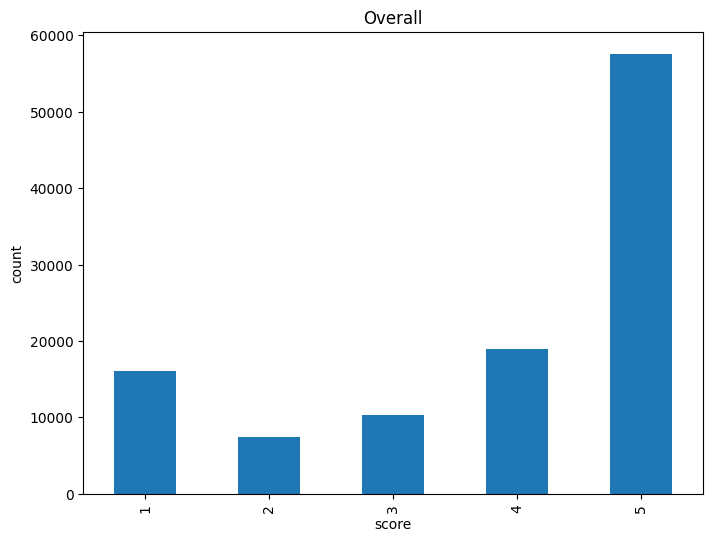

In [ ]:
plt.figure(figsize=(8, 6))
df_train['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Overall')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

# بالانس کردن دیتا

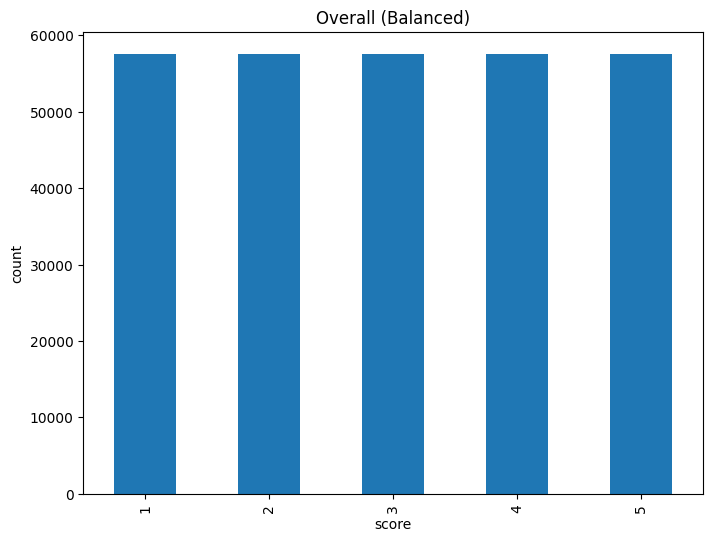

In [ ]:
# prompt: کلاس های ستون overal بالانس نیست،بالانسش کن

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler


X = df_train.drop('overall', axis=1)  
y = df_train['overall']


ros = RandomOverSampler(random_state=42)  


X_resampled, y_resampled = ros.fit_resample(X, y)


df_train_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_train_balanced['overall'] = y_resampled


plt.figure(figsize=(8, 6))
df_train_balanced['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Overall (Balanced)')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

df_train = df_train_balanced


# داده ها بالانس نیست

In [ ]:
# پیش‌پردازش متن
tokenizer = Tokenizer(num_words=5000) # تعداد کلمات پرتکرار
tokenizer.fit_on_texts(df_train['reviewText'])
sequences = tokenizer.texts_to_sequences(df_train['reviewText'])
padded_sequences = pad_sequences(sequences, maxlen=100) # طول

# تقسیم داده‌ها به آموزشی و اعتبارسنجی
X = padded_sequences
y = df_train['overall'].values - 1 # تبدیل امتیاز به اندیس (۰ تا ۴)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


# ساخت مدل
model = Sequential()
model.add(Embedding(5000, 32, input_length=100))
model.add(LSTM(64))
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(5, activation='softmax')) 

# کامپایل مدل
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# آموزش مدل
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# ارزیابی مدل
loss, accuracy = model.evaluate(X_val, y_val)
print('Loss:', loss)
print('Accuracy:', accuracy)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
7196/7196 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - accuracy: 0.4226 - loss: 1.2997 - val_accuracy: 0.5696 - val_loss: 1.0479
Epoch 2/5
7196/7196 ━━━━━━━━━━━━━━━━━━━━ 70s 10ms/step - accuracy: 0.6081 - loss: 0.9817 - val_accuracy: 0.6437 - val_loss: 0.9019
Epoch 3/5
7196/7196 ━━━━━━━━━━━━━━━━━━━━ 84s 10ms/step - accuracy: 0.6993 - loss: 0.8001 - val_accuracy: 0.7140 - val_loss: 0.7558
Epoch 4/5
7196/7196 ━━━━━━━━━━━━━━━━━━━━ 68s 9ms/step - accuracy: 0.7569 - loss: 0.6662 - val_accuracy: 0.7574 - val_loss: 0.6621
Epoch 5/5
7196/7196 ━━━━━━━━━━━━━━━━━━━━ 84s 10ms/step - accuracy: 0.8000 - loss: 0.5545 - val_accuracy: 0.7903 - val_loss: 0.5848
1799/1799 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7898 - loss: 0.5833
Loss: 0.5847618579864502
Accuracy: 0.7902928590774536


In [ ]:



model = Sequential()
model.add(Embedding(10000, 64, input_length=200)) 
model.add(Bidirectional(LSTM(128, return_sequences=True))) 
model.add(Conv1D(64, 5, activation='relu')) 
model.add(MaxPooling1D(pool_size=4)) 
model.add(LSTM(64)) 
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(5, activation='softmax')) 



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

Epoch 1/10
3598/3598 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - accuracy: 0.4483 - loss: 1.2563 - val_accuracy: 0.6023 - val_loss: 0.9773
Epoch 2/10
3598/3598 ━━━━━━━━━━━━━━━━━━━━ 83s 20ms/step - accuracy: 0.6404 - loss: 0.9213 - val_accuracy: 0.7006 - val_loss: 0.7922
Epoch 3/10
3598/3598 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - accuracy: 0.7509 - loss: 0.6957 - val_accuracy: 0.7603 - val_loss: 0.6532
Epoch 4/10
3598/3598 ━━━━━━━━━━━━━━━━━━━━ 78s 20ms/step - accuracy: 0.8119 - loss: 0.5371 - val_accuracy: 0.7865 - val_loss: 0.5880
Epoch 5/10
3598/3598 ━━━━━━━━━━━━━━━━━━━━ 74s 21ms/step - accuracy: 0.8513 - loss: 0.4270 - val_accuracy: 0.8319 - val_loss: 0.4857
Epoch 6/10
3598/3598 ━━━━━━━━━━━━━━━━━━━━ 88s 22ms/step - accuracy: 0.8761 - loss: 0.3526 - val_accuracy: 0.8461 - val_loss: 0.4630
Epoch 7/10
3598/3598 ━━━━━━━━━━━━━━━━━━━━ 76s 21ms/step - accuracy: 0.8972 - loss: 0.2965 - val_accuracy: 0.8604 - val_loss: 0.4421
Epoch 8/10
3598/3598 ━━━━━━━━━━━━━━━━━━━━ 78s 20ms/step - accuracy: 0.9135 -